In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [4]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [7]:
df['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [8]:
df.drop(columns = 'User ID', axis = 1, inplace = True)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaled_df = scaler.fit_transform(df)

In [11]:
scaled_df

array([[ 1.03252879, -0.47711966, -1.52849808, -0.81990292],
       [ 1.03252879, -0.00990495, -0.84676745, -0.81990292],
       [ 1.03252879,  0.83108153,  0.03803187, -0.81990292],
       ...,
       [-0.968496  , -1.13122026,  1.90916486,  1.21965659],
       [-0.968496  ,  0.73763859,  1.77862069,  1.21965659],
       [-0.968496  ,  0.36386682,  0.02352696, -0.81990292]])

In [12]:
scaled_df = pd.DataFrame(scaled_df)

In [13]:
scaled_df.head()

,0,1,2,3
0,1.032529,-0.477120,-1.528498,-0.819903
1,1.032529,-0.009905,-0.846767,-0.819903
2,1.032529,0.831082,0.038032,-0.819903
3,1.032529,-0.009905,1.009861,1.219657
4,1.032529,-1.411549,0.183081,-0.819903


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='AnnualSalary'>

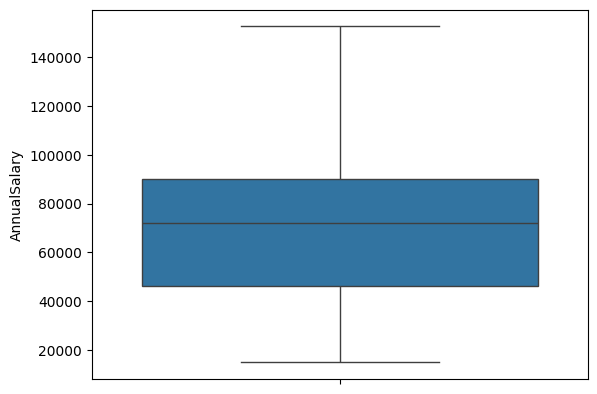

In [15]:
# sns.distplot(df['Gender'])
sns.boxplot(df['AnnualSalary'])


<Axes: ylabel='Age'>

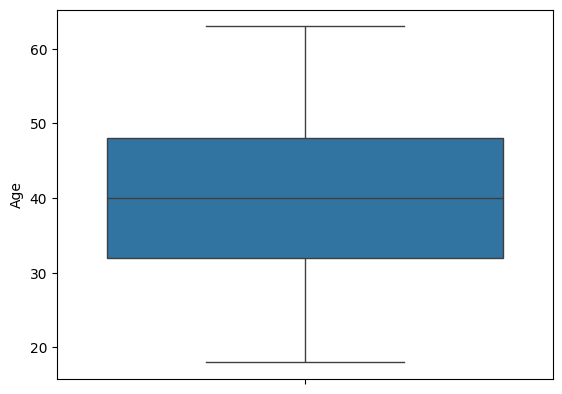

In [16]:
sns.boxplot(df['Age'])


# Linear Regression

In [17]:
df.drop(columns = 'User ID', axis = 1, inplace = True)


KeyError: "['User ID'] not found in axis"

In [ ]:
X = df.drop(columns = 'Purchased', axis = 1)
X.head()

In [ ]:
y = df['Purchased']
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(lr)

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

In [ ]:
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_absolute_error = ',mean_absolute_error(y_test, y_pred))


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso = Lasso()
ridge = Ridge()

In [ ]:
pipe = make_pipeline(lasso)

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

In [ ]:
pipe = make_pipeline(ridge)
pipe.fit(X_train, y_train)


In [ ]:
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

In [ ]:
print("No regularization:",r2_score(y_test,y_pred))
print("Lasso:",r2_score(y_test,y_pred_lasso))
print("Ridge:",r2_score(y_test,y_pred_ridge))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [ ]:
pipe = make_pipeline(dtr)

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred_dtr=pipe.predict(X_test)
r2_score(y_test,y_pred_dtr)

In [ ]:
mean_absolute_error(y_test,y_pred_dtr)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)

In [ ]:
pipe = make_pipeline(rf)
pipe.fit(X_train, y_train)

In [ ]:
y_pred_rf=pipe.predict(X_test)
r2_score(y_test,y_pred_rf)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
pipe = make_pipeline(knn)
pipe.fit(X_train, y_train)

In [ ]:
y_pred_knn = pipe.predict(X_test)
r2_score(y_test,y_pred_knn)

In [ ]:
mean_absolute_error(y_test, y_pred_knn)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)

pipe = make_pipeline(pf)
pipe.fit(X_train, y_train)
y_pred = pipe.fit_transform(X_test)